In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL# image library in python PILLOW
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
images_count=len(list(data_dir.glob('*/*.jpg')))

In [7]:
images_count

3670

In [8]:
roses=list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/roses/3654988152_b11178bbcb.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2053476785_c162a3e358.jpg'),
 P

In [9]:
roses[0:5]

[PosixPath('datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/537625768_791e973b40.jpg')]

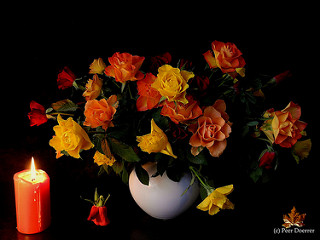

In [10]:
PIL.Image.open(str(roses[0]))

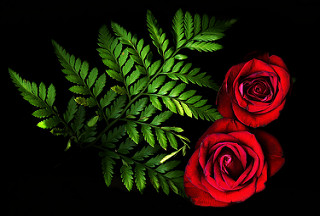

In [11]:
PIL.Image.open(str(roses[18]))

In [12]:
tulips=list(data_dir.glob('tulips/*'))

In [13]:
tulips

[PosixPath('datasets/flower_photos/tulips/9378657435_89fabf13c9_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5704726114_a92f753514.jpg'),
 PosixPath('datasets/flower_photos/tulips/8623170936_83f4152431.jpg'),
 PosixPath('datasets/flower_photos/tulips/7205145492_baec4dbb94.jpg'),
 PosixPath('datasets/flower_photos/tulips/3991423020_9aaf2b5974_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8686332852_c6dcb2e86b.jpg'),
 PosixPath('datasets/flower_photos/tulips/130684941_d1abfa3be6_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14057246122_8598b665bd.jpg'),
 PosixPath('datasets/flower_photos/tulips/113291410_1bdc718ed8_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3459922572_bc8516b5fe_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/8768645961_8f1e097170_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8712263493_3db76c5f82.jpg'),
 PosixPath('datasets/flower_photos/tulips/14836105101_1d07520932_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68

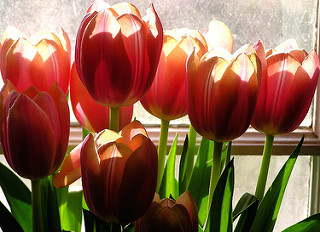

In [14]:
PIL.Image.open(str(tulips[8]))

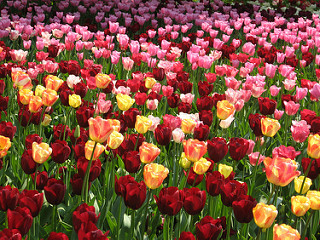

In [15]:
PIL.Image.open(str(tulips[100]))

In [16]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg'

In [19]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  2, 17],
        [ 1,  2, 22],
        [ 2,  1, 27],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[ 0,  0, 17],
        [ 1,  2, 22],
        [ 2,  1, 27],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 0,  0, 18],
        [ 2,  3, 24],
        [ 4,  3, 29],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [21]:
img.shape

(240, 320, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [23]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [24]:
X=np.array(X)
y=np.array(y)

In [25]:
y[:7]

array([0, 0, 0, 0, 0, 0, 0])

In [26]:
X[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 1,  1, 19],
        [ 2,  2, 27],
        [ 3,  2, 36],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[ 0,  1, 19],
        [ 2,  1, 27],
        [ 1,  0, 35],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 1,  1, 20],
        [ 3,  2, 29],
        [ 2,  0, 36],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
len(X_train )

2752

In [29]:
len(X_test)

918

In [30]:
#Scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
X_train_scaled[2]

array([[[0.18823529, 0.74509804, 0.57647059],
        [0.17647059, 0.74509804, 0.58039216],
        [0.16862745, 0.74117647, 0.57647059],
        ...,
        [0.2       , 0.7254902 , 0.54509804],
        [0.21568627, 0.74509804, 0.56470588],
        [0.20784314, 0.74901961, 0.57254902]],

       [[0.2       , 0.75294118, 0.58431373],
        [0.18039216, 0.74901961, 0.57647059],
        [0.17254902, 0.74901961, 0.58039216],
        ...,
        [0.20392157, 0.72941176, 0.54901961],
        [0.21568627, 0.74509804, 0.56470588],
        [0.21176471, 0.75294118, 0.57647059]],

       [[0.19607843, 0.74901961, 0.58039216],
        [0.17647059, 0.74509804, 0.57254902],
        [0.17647059, 0.75294118, 0.58039216],
        ...,
        [0.2       , 0.72941176, 0.54901961],
        [0.21568627, 0.74509804, 0.56470588],
        [0.21176471, 0.74901961, 0.57647059]],

       ...,

       [[0.05490196, 0.37647059, 0.25098039],
        [0.15294118, 0.43137255, 0.3254902 ],
        [0.14901961, 0

In [33]:
#build a model
num_classes=5
model=Sequential([

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)#linear activation no need to specify here
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 17s 28ms/step - loss: 1.3083 - accuracy: 0.4448
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9706 - accuracy: 0.6265
Epoch 3/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8086 - accuracy: 0.6930
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6486 - accuracy: 0.7565
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.4835 - accuracy: 0.8263
Epoch 6/30
86/86 [==============================] - 3s 30ms/step - loss: 0.3236 - accuracy: 0.8906
Epoch 7/30
86/86 [==============================] - 2s 27ms/step - loss: 0.2094 - accuracy: 0.9346
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.1494 - accuracy: 0.9480
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.0858 - accuracy: 0.9753
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0514 - accuracy: 0.9855
Epoch 11

In [34]:
model.evaluate(X_test_scaled,y_test)#overfitting

29/29 [==============================] - 1s 19ms/step - loss: 2.8387 - accuracy: 0.6285


[2.838693618774414, 0.6285402774810791]

In [35]:
pred=model.predict(X_test_scaled)
pred

29/29 [==============================] - 0s 11ms/step


array([[  1.5458082,   7.455201 ,  -2.2352371,  -1.3474357,  -1.6897036],
       [ 13.175996 ,  -9.489185 , -11.968061 , -13.302001 ,   7.1485243],
       [ -4.483757 ,   2.6011157,   6.0555415,  -5.931672 ,  -3.5140233],
       ...,
       [  1.7068062,  -2.5949464,  -7.0286965,  13.619601 ,  -4.2631564],
       [ 24.345337 , -17.809412 , -18.604628 ,  -5.547024 ,  16.310894 ],
       [ -7.2703996,  -2.820221 ,   3.8298867,   5.8013945,  -2.780364 ]],
      dtype=float32)

In [36]:
score=tf.nn.softmax(pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.70562829e-03, 9.96976376e-01, 6.16851976e-05, 1.49881540e-04,
       1.06439555e-04], dtype=float32)>

In [37]:
np.argmax(score)

1

In [38]:
y_test[0]

1

In [41]:
#using dataaugmention for overfitting using API
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

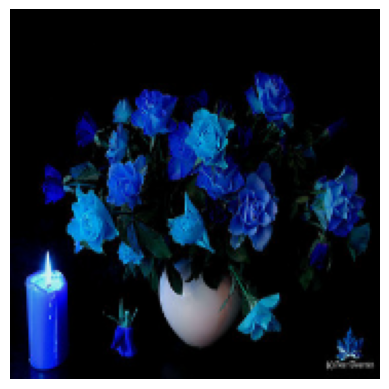

In [42]:
plt.axis('off')
plt.imshow(X[0])

In [43]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.  

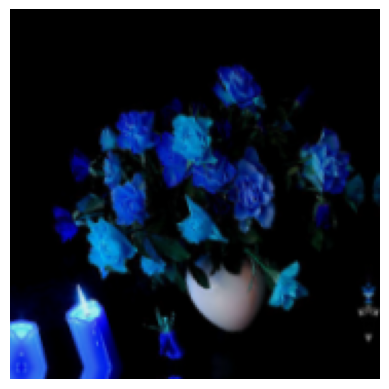

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [45]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 [==============================] - 6s 29ms/step - loss: 1.3720 - accuracy: 0.4219
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0653 - accuracy: 0.5832
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9614 - accuracy: 0.6334
Epoch 4/30
86/86 [==============================] - 3s 29ms/step - loss: 0.9066 - accuracy: 0.6421
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8338 - accuracy: 0.6802
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7685 - accuracy: 0.7068
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7368 - accuracy: 0.7202
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6944 - accuracy: 0.7406
Epoch 9/30
86/86 [==============================] - 3s 29ms/step - loss: 0.6681 - accuracy: 0.7500
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6040 - accuracy: 0.7711
Epoch 11/

In [46]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 1.2146 - accuracy: 0.7026


[1.2145620584487915, 0.7026143670082092]

In [ ]:
|